In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importando o dataframe
fob = pd.read_excel("data/RBRTEd.xls", sheet_name="Data 1")

In [3]:
fob.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
fob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date                                              9360 non-null   datetime64[ns]
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9360 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.4 KB


In [5]:
fob.shape

(9360, 2)

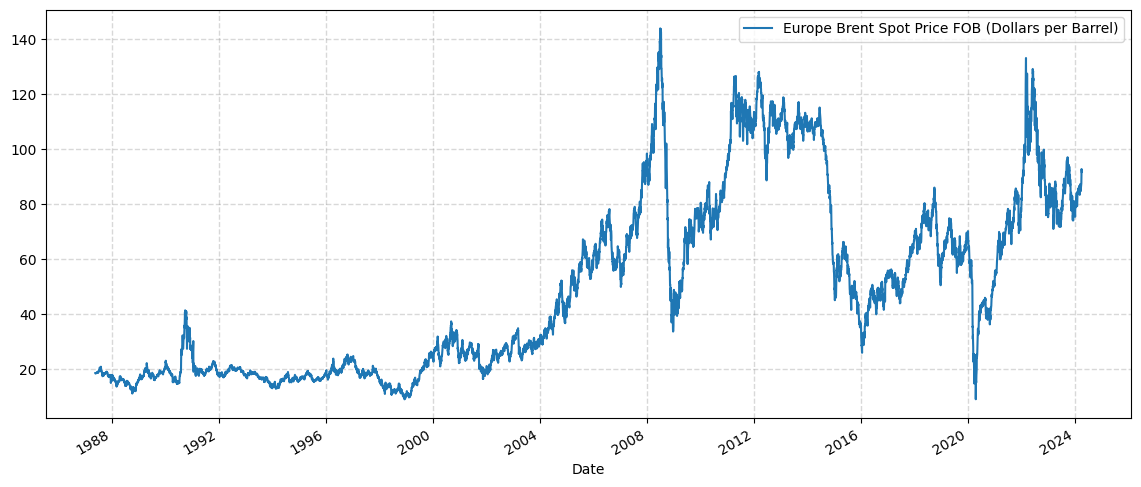

In [6]:
fob.plot(x="Date", y="Europe Brent Spot Price FOB (Dollars per Barrel)", figsize=(14,6))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.show()

## Decompondo a série

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
fob = fob.set_index('Date')

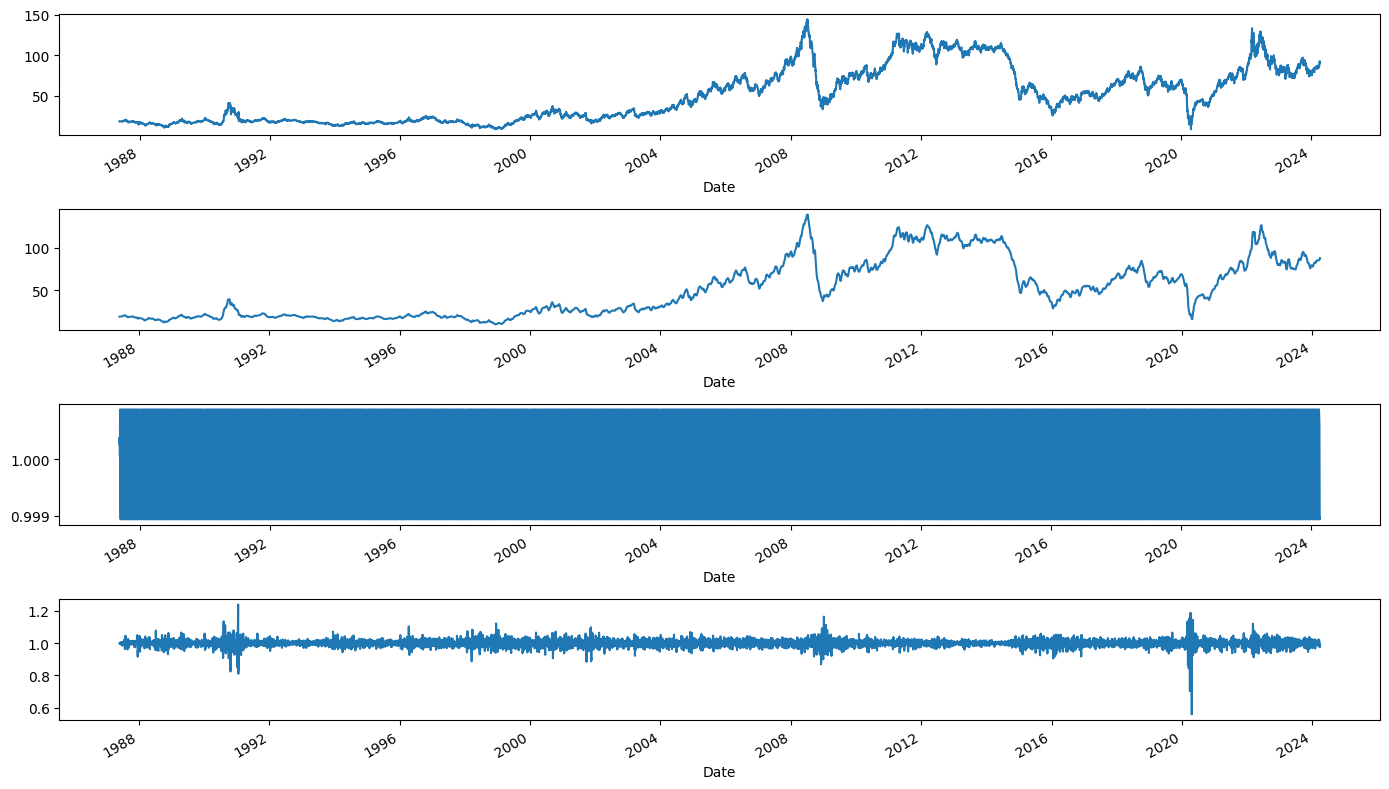

In [9]:
seasonplot = seasonal_decompose(fob, model='multiplicative', period=10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

## Trabalhando com estacionaridade (MMA e Arima)

In [10]:
fob = fob.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'dollars_per_barrel'})
fob.head()

,dollars_per_barrel
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [11]:
fob_ma = fob
fob_ma['ma_window_10'] = fob['dollars_per_barrel'].rolling(10).mean().shift()
fob_ma['ma_window_20'] = fob['dollars_per_barrel'].rolling(20).mean().shift()
fob_ma.head(21)

,dollars_per_barrel,ma_window_10,ma_window_20
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,NaN,NaN
1987-05-22,18.55,NaN,NaN
1987-05-25,18.60,NaN,NaN
1987-05-26,18.63,NaN,NaN
1987-05-27,18.60,NaN,NaN
1987-05-28,18.60,NaN,NaN
1987-05-29,18.58,NaN,NaN
1987-06-01,18.65,NaN,NaN


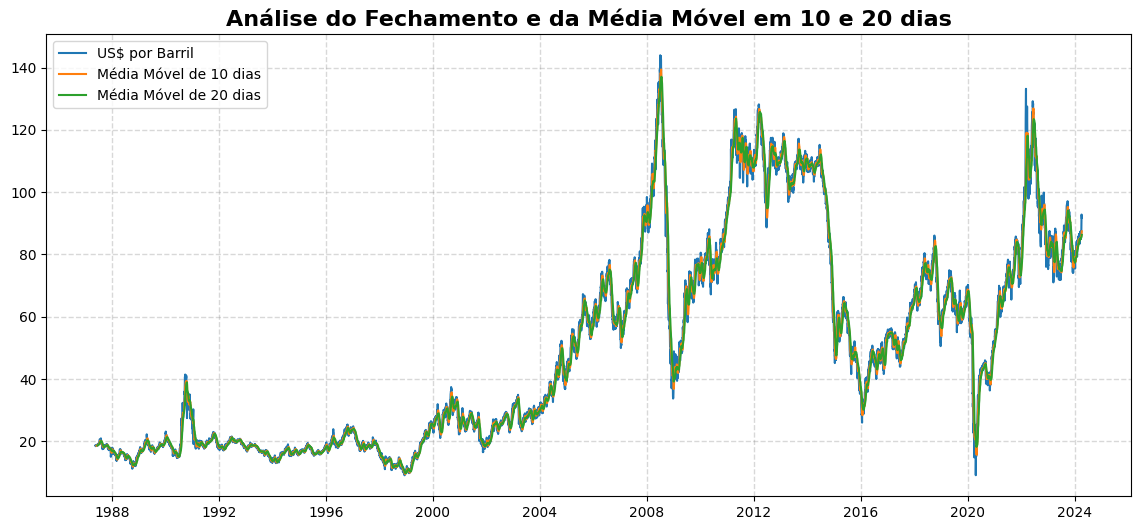

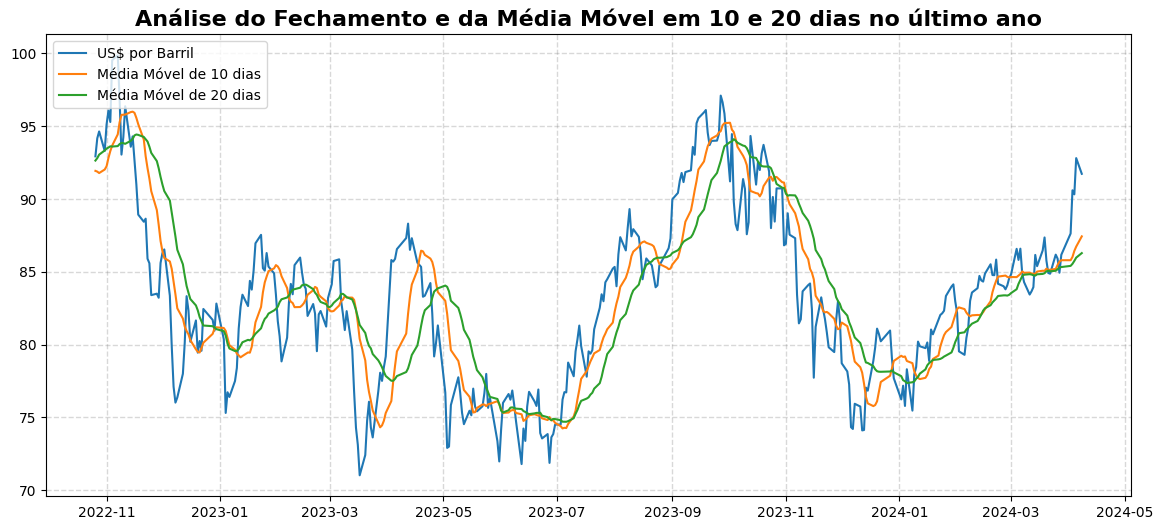

In [35]:
plt.figure(figsize=(14,6))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.plot(fob_ma['dollars_per_barrel'], label = 'US$ por Barril')
plt.plot(fob_ma['ma_window_10'], label = 'Média Móvel de 10 dias')
plt.plot(fob_ma['ma_window_20'], label = 'Média Móvel de 20 dias')
plt.legend(loc=2)
plt.title(label = 'Análise do Fechamento e da Média Móvel em 10 e 20 dias',
          fontsize=16, weight='bold')
plt.show()


limit = 365 # destacando o período o último ano
plt.figure(figsize=(14,6))
plt.grid(color = 'gray', linestyle= '--', linewidth = 1, alpha = 0.3)
plt.plot(fob_ma['dollars_per_barrel'][-limit:], label = 'US$ por Barril')
plt.plot(fob_ma['ma_window_10'][-limit:], label = 'Média Móvel de 10 dias')
plt.plot(fob_ma['ma_window_20'][-limit:], label = 'Média Móvel de 20 dias')
plt.legend(loc=2)
plt.title(label = 'Análise do Fechamento e da Média Móvel em 10 e 20 dias no último ano',
          fontsize=16, weight='bold')
plt.show()